In [2]:

import sys
from pathlib import Path
project_root = Path.cwd().parent
sys.path.append(str(project_root))
from visualization.utils import defaultColors
from mobo.utils import calculate_var

In [3]:

import pandas as pd
from pathlib import Path
import yaml

z-score for alpha=0.9: 1.2815515655446004


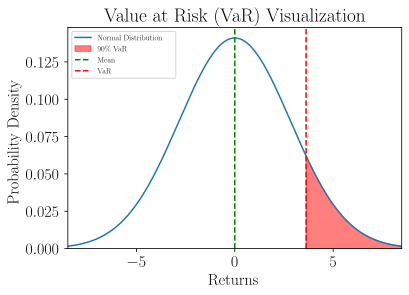

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

%config InlineBackend.figure_format='svg'
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Helvetica"],
    # font size
    "font.size": 16,
})

def visualize_var(mean, std, var, var_measured=None, alpha=0.9):
    # Generate points for the normal distribution
    x = np.linspace(mean - 3*std, mean + 3*std, 1000)
    y = norm.pdf(x, mean, std)

    figsize = (6, 4)
    plt.figure(figsize=figsize)
    # Plot the normal distribution
    plt.plot(x, y, label='Normal Distribution')

    # Highlight the area under the curve for the VaR
    x_fill = np.linspace(var, mean + 3*std, 1000)
    y_fill = norm.pdf(x_fill, mean, std)
    plt.fill_between(x_fill, 0, y_fill, color='red', alpha=0.5, label=f'{int(alpha*100)}\% VaR')

    # Draw a line for the mean
    plt.axvline(x=mean, color='green', linestyle='--', label='Mean')
    
    # Draw a line for the VaR
    plt.axvline(x=var, color='red', linestyle='--', label='VaR')
    
    if var_measured:
        plt.axvline(x=var_measured, color='purple', linestyle='--', label='VaR Measured')
        
    plt.ylim(0)
    plt.xlim(mean - 3*std, mean + 3*std)

    plt.title('Value at Risk (VaR) Visualization')
    plt.xlabel('Returns')
    plt.ylabel('Probability Density')
    plt.legend(fontsize=8, loc='upper left')
    plt.show()

# Example usage
mean = 0
std = np.sqrt(8)
alpha = 0.9
z = norm.ppf(alpha)
print(f'z-score for alpha={alpha}: {z}')
var = calculate_var(mean, std=std, alpha=alpha)
visualize_var(mean=mean, std=std, var=var, alpha=alpha)


x1: 0.5, x2: 0.25
mean: -0.5460737670969569, rho_std: 0.062485035741029225, mvar: -0.512626758834731, var_calculated: -0.46599597171993057


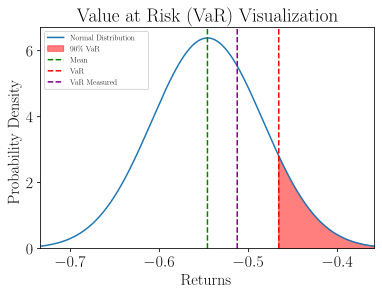

In [5]:

# path = Path(r"..\results\peaks\default\mars\0")
# path = Path("../result/peaks/default/mars/0/")
path = Path("../result/exp4d/unroll_new/marsdet/0/")
approx_all_df = pd.read_csv(path / "ApproximationAll.csv")
approx_all_df.columns
# 'iterID', 'F_1', 'F_2', 'S_1', 'S_2', 'rho_F_1', 'rho_F_2', 'rho_S_1','rho_S_2', 'mvar_F_1', 'mvar_F_2', 'x1', 'x2'
# test case for the function

# mean, std, mvar = approx_all_df['F_1'][10] , approx_all_df['rho_F_1'][10], approx_all_df['mvar_F_1'][10]
point = 100
# argmax_rho1 = approx_all_df['rho_F_1'].argmax()
# point = argmax_rho1
x1, x2 = approx_all_df['x1'][point], approx_all_df['x2'][point]
mean, rho, mvar = approx_all_df['F_1'][point] , approx_all_df['rho_F_1'][point], approx_all_df['mvar_F_1'][point]
rho_std = np.sqrt(rho)
alpha = 0.9
var_calculated = calculate_var(mean, variance=rho, alpha=alpha)
print(f"x1: {x1}, x2: {x2}")
print(f"mean: {mean}, rho_std: {rho_std}, mvar: {mvar}, var_calculated: {var_calculated}")
visualize_var(mean=mean, std=rho_std, var=var_calculated, var_measured=mvar, alpha=alpha)

 